## Task 1

We have two populations Blue (privileged) and Red (unprivileged), with the Blue population being 9 times larger than the Red population.

Individuals from both populations are requesting to attend XAI training to improve competency in this important area. Number of places is limited. The administrators of the training have decided to give priority to enrolling individuals who may need this training in the future, although unfortunately it is difficult to predict who will benefit.

The decision rule adopted:
1. In the Red group, half of the people will find the skills useful in future and half will not. Administrators randomly allocate 50% of people to training.
2. in the Blue group, 80% of people will find the training useful in future and 20% will not, although of course it is not known who will find it useful. The administrators have built a predictive model based on user behaviour in predicting for whom it will be useful and whom will not. The model has the following performance:


| Blue                     	| Will use XAI 	| Will not use XAI 	| Total 	|
|--------------------------	|--------------	|------------------	|-------	|
| Enrolled in training     	| 60           	| 5               	| 65    	|
| not enrolled in training 	| 20            	| 15               	| 35    	|
| Total                    	| 80           	| 20               	| 100   	|


Task: Calculate the Demographic parity, equal opportunity and predictive rate parity coefficients for this decision rule.

Starred task: How can this decision rule be changed to improve its fairness?

## Solution of the Task 1
Let x be the size of the Red population. Then, the decision rule chosen for the Red group has the following performance:


| Red                     	| Will use XAI 	| Will not use XAI 	| Total 	|
|--------------------------	|--------------	|------------------	|-------	|
| Enrolled in training     	| 0.25x           	| 0.25x               	| 0.5x    	|
| not enrolled in training 	| 0.25x            	| 0.25x               	| 0.5x    	|
| Total                    	| 0.5x           	| 0.5x               	| x   	|


Let $A = \{{a, b}\}$, and a - membership to the privileged group, and b - the contrary.

### Demographic parity
$$
P(\hat{Y} = 1 | A = a) = 65 / 100 = 65\%
$$
$$
P(\hat{Y} = 1 | A = b) = 0.5\text{x} / \text{x} = 50\%
$$

### Equal opportunity
$$
P(\hat{Y} = 1 | A = a \land Y = 1 ) = 60 / 80 = 75\%
$$
$$
P(\hat{Y} = 1 | A = b \land Y = 1 ) = 0.25\text{x} / 0.5\text{x} = 50\%
$$

### Predictive rate parity
- Positive predictive parity
$$
P(Y = 1 | A = a \land \hat{Y} = 1 ) = 60 / 65 \approx 92\%
$$
$$
P(Y = 1 | A = b \land \hat{Y} = 1 ) = 0.5\text{x} / \text{x} = 50\%
$$

- Negative predictive parity
$$
P(Y = 0 | A = a \land \hat{Y} = 0 ) = 20 / 35 \approx 57\%
$$
$$
P(Y = 0 | A = b \land \hat{Y} = 0 ) = 0.5\text{x} / \text{x} = 50\%
$$










Let's discuss increasing the enrollment rate for the Red group to match the enrollment rate of the model for the Blue group. It would improve demographic parity, because indivduals from both groups would have the same chance to get selected.

If the selection would still be made randomly, the performance would look as following:

| Red                     	| Will use XAI 	| Will not use XAI 	| Total 	|
|--------------------------	|--------------	|------------------	|-------	|
| Enrolled in training     	| 0.325x           	| 0.325x               	| 0.65x    	|
| not enrolled in training 	| 0.175x            	| 0.175x               	| 0.35x    	|
| Total                    	| 0.5x           	| 0.5x               	| x   	|

The true positive rate for the Red group would increase to $65\%$ which brings it closer to the TPR of the Blue group - 75%, which narrows the difference in equal opportunity between the two groups.

Positive and negative predictiive parity would stay at the same level.




## Task 2

For this homework, train few models on a selected dataset from https://github.com/ahxt/fair_fairness_benchmark/:

Prepare a knitr/jupiter notebook with the following points.
Submit your results on GitHub to the directory `Homeworks/HW1`.

1. Train a model for the selected dataset.
2. For the selected protected attribute (age, gender, race) calculate the following fairness coefficients: Statistical parity, Equal opportunity, Predictive parity.
3. Train another model (different hyperparameters, feature transformations etc., different family of models) and see how the coefficients Statistical parity, Equal opportunity, Predictive parity behave for it. Are they different/similar?
4. Apply the selected bias mitigation technique (like data balancing) on the first model. Check how Statistical parity, Equal opportunity, Predictive parity coefficients behave after this mittigation.
5. Compare the quality (performance) of the three models with their fairness coefficients. Is there any correlation/trade off?
6. ! COMMENT on the results obtained in (2)-(5)



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import matplotlib.pyplot as plt



## Task 2.1

### Data overview

In [ ]:
raw_df = pd.read_csv("/content/drive/MyDrive/XAI/compas-scores-two-years.csv")

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
raw_df

,id,name,first,last,compas_screening_date,sex,dob,age,age_cat,race,juv_fel_count,decile_score,juv_misd_count,juv_other_count,priors_count,days_b_screening_arrest,c_jail_in,c_jail_out,c_case_number,c_offense_date,c_arrest_date,c_days_from_compas,c_charge_degree,c_charge_desc,is_recid,r_case_number,r_charge_degree,r_days_from_arrest,r_offense_date,r_charge_desc,r_jail_in,r_jail_out,violent_recid,is_violent_recid,vr_case_number,vr_charge_degree,vr_offense_date,vr_charge_desc,type_of_assessment,decile_score.1,score_text,screening_date,v_type_of_assessment,v_decile_score,v_score_text,v_screening_date,in_custody,out_custody,priors_count.1,start,end,event,two_year_recid
0,1,miguel hernandez,miguel,hernandez,2013-08-14,Male,1947-04-18,69,Greater than 45,Other,0,1,0,0,0,-1.0,2013-08-13 06:03:42,2013-08-14 05:41:20,13011352CF10A,2013-08-13,NaN,1.0,F,Aggravated Assault w/Firearm,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,Risk of Recidivism,1,Low,2013-08-14,Risk of Violence,1,Low,2013-08-14,2014-07-07,2014-07-14,0,0,327,0,0
1,3,kevon dixon,kevon,dixon,2013-01-27,Male,1982-01-22,34,25 - 45,African-American,0,3,0,0,0,-1.0,2013-01-26 03:45:27,2013-02-05 05:36:53,13001275CF10A,2013-01-26,NaN,1.0,F,Felony Battery w/Prior Convict,1,13009779CF10A,(F3),NaN,2013-07-05,Felony Battery (Dom Strang),NaN,NaN,NaN,1,13009779CF10A,(F3),2013-07-05,Felony Battery (Dom Strang),Risk of Recidivism,3,Low,2013-01-27,Risk of Violence,1,Low,2013-01-27,2013-01-26,2013-02-05,0,9,159,1,1
2,4,ed philo,ed,philo,2013-04-14,Male,1991-05-14,24,Less than 25,African-American,0,4,0,1,4,-1.0,2013-04-13 04:58:34,2013-04-14 07:02:04,13005330CF10A,2013-04-13,NaN,1.0,F,Possession of Cocaine,1,13011511MM10A,(M1),0.0,2013-06-16,Driving Under The Influence,2013-06-16,2013-06-16,NaN,0,NaN,NaN,NaN,NaN,Risk of Recidivism,4,Low,2013-04-14,Risk of Violence,3,Low,2013-04-14,2013-06-16,2013-06-16,4,0,63,0,1
3,5,marcu brown,marcu,brown,2013-01-13,Male,1993-01-21,23,Less than 25,African-American,0,8,1,0,1,NaN,NaN,NaN,13000570CF10A,2013-01-12,NaN,1.0,F,Possession of Cannabis,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,Risk of Recidivism,8,High,2013-01-13,Risk of Violence,6,Medium,2013-01-13,NaN,NaN,1,0,1174,0,0
4,6,bouthy pierrelouis,bouthy,pierrelouis,2013-03-26,Male,1973-01-22,43,25 - 45,Other,0,1,0,0,2,NaN,NaN,NaN,12014130CF10A,NaN,2013-01-09,76.0,F,arrest case no charge,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,Risk of Recidivism,1,Low,2013-03-26,Risk of Violence,1,Low,2013-03-26,NaN,NaN,2,0,1102,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7209,10996,steven butler,steven,butler,2013-11-23,Male,1992-07-17,23,Less than 25,African-American,0,7,0,0,0,-1.0,2013-11-22 05:18:27,2013-11-24 02:59:20,13016249CF10A,2013-11-22,NaN,1.0,F,Deliver Cannabis,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,Risk of Recidivism,7,Medium,2013-11-23,Risk of Violence,5,Medium,2013-11-23,2013-11-22,2013-11-24,0,1,860,0,0
7210,10997,malcolm simmons,malcolm,simmons,2014-02-01,Male,1993-03-25,23,Less than 25,African-American,0,3,0,0,0,-1.0,2014-01-31 07:13:54,2014-02-02 04:03:52,14001422CF10A,2014-01-31,NaN,1.0,F,Leaving the Scene of Accident,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,Risk of Recidivism,3,Low,2014-02-01,Risk of Violence,5,Medium,2014-02-01,2014-01-31,2014-02-02,0,1,790,0,0
7211,10999,winston gregory,winston,gregory,2014-01-14,Male,1958-10-01,57,Greater than 45,Other,0,1,0,0,0,-1.0,2014-01-13 05:48:01,2014-01-14 07:49:46,14000581CF10A,2014-01-13,NaN,1.0,F,Aggravated Battery / Pregnant,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,Risk of Recidivism,1,Low,2014-01-14,Risk of Violence,1,Low,2014-01-14,2014-01-13,2014-01-14,0,0,808,0,0
7212,11000,farrah jean,farrah,jean,2014-03-09,Female,1982-11-17,33,25 - 45,African-American,0,2,0,0,3,-1.0,2014-03-08 08:06:02,2014-03-09 12:18:04,140033

In [ ]:
raw_df.dtypes

,0
id,int64
name,object
first,object
last,object
compas_screening_date,object
sex,object
dob,object
age,int64
age_cat,object
race,object


### Data cleaning

In [ ]:
# removing outliers as in: https://mlr3fairness.mlr-org.com/reference/compas.html
raw_df = raw_df[raw_df["days_b_screening_arrest"] <= 30]
raw_df = raw_df[raw_df["days_b_screening_arrest"] >= -30]


In [ ]:
for col in raw_df.columns:
    if raw_df[col].dtype == 'object':
        print(col, raw_df[col].nunique())


name 6128
first 2493
last 3465
compas_screening_date 685
sex 2
dob 4830
age_cat 3
race 6
c_jail_in 6172
c_jail_out 6161
c_case_number 6172
c_offense_date 736
c_arrest_date 416
c_charge_degree 2
c_charge_desc 389
r_case_number 2990
r_charge_degree 10
r_offense_date 1040
r_charge_desc 318
r_jail_in 923
r_jail_out 892
vr_case_number 692
vr_charge_degree 9
vr_offense_date 504
vr_charge_desc 81
type_of_assessment 1
score_text 3
screening_date 685
v_type_of_assessment 1
v_score_text 3
v_screening_date 685
in_custody 1087
out_custody 1097


In [ ]:
columns_to_include = [
    "sex",
    "age",
    "age_cat",
    "race",
    "juv_fel_count",
    "juv_misd_count",
    "juv_other_count",
    "priors_count",
    "c_charge_degree",
    "two_year_recid"
]

In [ ]:
df_cleaned = raw_df[columns_to_include].copy()
df_cleaned

,sex,age,age_cat,race,juv_fel_count,juv_misd_count,juv_other_count,priors_count,c_charge_degree,two_year_recid
0,Male,69,Greater than 45,Other,0,0,0,0,F,0
1,Male,34,25 - 45,African-American,0,0,0,0,F,1
2,Male,24,Less than 25,African-American,0,0,1,4,F,1
5,Male,44,25 - 45,Other,0,0,0,0,M,0
6,Male,41,25 - 45,Caucasian,0,0,0,14,F,1
...,...,...,...,...,...,...,...,...,...,...
7209,Male,23,Less than 25,African-American,0,0,0,0,F,0
7210,Male,23,Less than 25,African-American,0,0,0,0,F,0
7211,Male,57,Greater than 45,Other,0,0,0,0,F,0
7212,Female,33,25 - 45,African-American,0,0,0,3,M,0


In [ ]:
df_cleaned = df_cleaned.dropna()
df_cleaned

,sex,age,age_cat,race,juv_fel_count,juv_misd_count,juv_other_count,priors_count,c_charge_degree,two_year_recid
0,Male,69,Greater than 45,Other,0,0,0,0,F,0
1,Male,34,25 - 45,African-American,0,0,0,0,F,1
2,Male,24,Less than 25,African-American,0,0,1,4,F,1
5,Male,44,25 - 45,Other,0,0,0,0,M,0
6,Male,41,25 - 45,Caucasian,0,0,0,14,F,1
...,...,...,...,...,...,...,...,...,...,...
7209,Male,23,Less than 25,African-American,0,0,0,0,F,0
7210,Male,23,Less than 25,African-American,0,0,0,0,F,0
7211,Male,57,Greater than 45,Other,0,0,0,0,F,0
7212,Female,33,25 - 45,African-American,0,0,0,3,M,0


In [ ]:
df_cleaned.groupby("race")["two_year_recid"].value_counts()

race              two_year_recid
African-American  1                 1661
                  0                 1514
Asian             0                   23
                  1                    8
Caucasian         0                 1281
                  1                  822
Hispanic          0                  320
                  1                  189
Native American   0                    6
                  1                    5
Other             0                  219
                  1                  124
Name: count, dtype: int64

### Encode categorical variables

In [ ]:
encoders = {
    "sex": LabelEncoder(),
    "age_cat": LabelEncoder(),
    "race": LabelEncoder(),
    "c_charge_degree": LabelEncoder()
}

for column, encoder in encoders.items():
    df_cleaned[column] = encoder.fit_transform(df_cleaned[column])


In [ ]:
for col in df_cleaned.columns:
    if df_cleaned[col].dtype != 'object':
        print(col, df_cleaned[col].max())

sex 1
age 96
age_cat 2
race 5
juv_fel_count 20
juv_misd_count 13
juv_other_count 9
priors_count 38
c_charge_degree 1
two_year_recid 1


In [ ]:
X = df_cleaned.drop("two_year_recid", axis=1)
y = df_cleaned["two_year_recid"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4320, 9), (1852, 9), (4320,), (1852,))

### Training a random forest classifier

In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)


## Task 2.2

### Computing fairness metrics for race class


In [ ]:
def compute_fairness_coefficients(y_true, y_pred, X):
    encoder = encoders["race"]
    classes = encoder.classes_
    values = encoder.transform(classes)
    statistical_parity = {}
    equal_opportunity = {}
    positive_predictive_parity = {}
    negative_predictive_parity = {}
    for c, v in zip(classes, values):
        y_true_c = y_true[X["race"] == v]
        y_pred_c = y_pred[X["race"] == v]
        statistical_parity[c] = np.mean(y_pred_c)
        equal_opportunity[c] = np.mean(y_pred_c[y_true_c == 1])
        positive_predictive_parity[c] = np.mean(y_true_c[y_pred_c == 1])
        negative_predictive_parity[c] = np.mean(y_true_c[y_pred_c == 0])

    return {
        "statistical_parity": statistical_parity,
        "equal_opportunity": equal_opportunity,
        "positive_predictive_parity": positive_predictive_parity,
        "negative_predictive_parity": negative_predictive_parity
    }

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
fairness_coefficients = compute_fairness_coefficients(y_test, y_pred, X_test,)

print("Accuracy:", accuracy)
print("Fairness coefficients:", json.dumps(fairness_coefficients, indent=4))

Accuracy: 0.6765658747300216
Fairness coefficients: {
    "statistical_parity": {
        "African-American": 0.5455497382198953,
        "Asian": 0.25,
        "Caucasian": 0.2665615141955836,
        "Hispanic": 0.31788079470198677,
        "Native American": 0.0,
        "Other": 0.32673267326732675
    },
    "equal_opportunity": {
        "African-American": 0.7163265306122449,
        "Asian": 0.3333333333333333,
        "Caucasian": 0.4186991869918699,
        "Hispanic": 0.5192307692307693,
        "Native American": 0.0,
        "Other": 0.525
    },
    "positive_predictive_parity": {
        "African-American": 0.6737044145873321,
        "Asian": 0.5,
        "Caucasian": 0.6094674556213018,
        "Hispanic": 0.5625,
        "Native American": NaN,
        "Other": 0.6363636363636364
    },
    "negative_predictive_parity": {
        "African-American": 0.32027649769585254,
        "Asian": 0.3333333333333333,
        "Caucasian": 0.30752688172043013,
        "Hispanic": 

Model predictions are correct in 67,66%.

From the statistical parity coefficients, we can draw a conclusion that African-Americans have the highest proportion of positive predictions - 54,55% which is much larger than that of Hispanic (31,78%), Caucasian (26,65%) and other groups.

Next, we can see that African-Americans have the highest true positive rate (71,63%), which tells us how well the model identifies actual recidivists among the group. For other groups this coefficient is much lower, starting from 51,92% for Caucasians and ending on 33,33% for Asians and 0.0% for Native Americans.
Value of the coefficient for Native Americans is indicating that the model fails to identify recidivism among them, probably due to very few instances with that race in the data set.

Positive predictive parity tells us the proportion of predicted recidivism cases that are correct. High value for African-Americans (67,37%) allows us to assume that when the model predicts a recidivism for that group, it is often right. However, other groups (except Native Americans for who the model failed to correctly predict recidivism) also have high coefficient (larger than 50%).

Anologously, negative predictive parity tells us, how often the model is right when predicting non-recidivism. Here, values are much lower for every group, still with Native-Americans having the highest coefficient.

## Task 2.4

### Training a random forest classifier with samples weighted by the inverse of the race class distribution

In [ ]:
race_dist = df_cleaned["race"].value_counts(normalize=True)
pd.DataFrame({"race_string": encoders["race"].classes_, "race_dist": race_dist})

,race_string,race_dist
race,,
0,African-American,0.514420
2,Asian,0.340732
3,Caucasian,0.082469
5,Hispanic,0.055574
1,Native American,0.005023
4,Other,0.001782


In [ ]:
weights = 1 / race_dist
pd.DataFrame({"race_string": encoders["race"].classes_, "weights": weights})

,race_string,weights
race,,
0,African-American,1.943937
2,Asian,2.934855
3,Caucasian,12.125737
5,Hispanic,17.994169
1,Native American,199.096774
4,Other,561.090909


In [ ]:
weights_train = X_train["race"].map(weights)
weights_train

,race
865,1.943937
6088,2.934855
851,2.934855
481,12.125737
4972,1.943937
...,...
1144,2.934855
1960,1.943937
3887,2.934855
1985,2.934855


In [ ]:
model = RandomForestClassifier(n_estimators=500, random_state=42, max_depth=10)

model.fit(X_train, y_train, sample_weight=weights_train)

y_pred = model.predict(X_test)

accuracy_weighted = accuracy_score(y_test, y_pred)
fairness_coefficients_weighted = compute_fairness_coefficients(y_test, y_pred, X_test)

print("Accuracy:", accuracy_weighted)
print("Fairness coefficients:", json.dumps(fairness_coefficients_weighted, indent=4))


Accuracy: 0.6808855291576674
Fairness coefficients: {
    "statistical_parity": {
        "African-American": 0.5401301518438177,
        "Asian": 0.4,
        "Caucasian": 0.3033175355450237,
        "Hispanic": 0.2603550295857988,
        "Native American": 0.25,
        "Other": 0.2982456140350877
    },
    "equal_opportunity": {
        "African-American": 0.7246376811594203,
        "Asian": 0.0,
        "Caucasian": 0.46987951807228917,
        "Hispanic": 0.3582089552238806,
        "Native American": 1.0,
        "Other": 0.4883720930232558
    },
    "positive_predictive_parity": {
        "African-American": 0.7028112449799196,
        "Asian": 0.0,
        "Caucasian": 0.609375,
        "Hispanic": 0.5454545454545454,
        "Native American": 1.0,
        "Other": 0.6176470588235294
    },
    "negative_predictive_parity": {
        "African-American": 0.3136792452830189,
        "Asian": 0.16666666666666666,
        "Caucasian": 0.29931972789115646,
        "Hispanic": 0

## Task 2.3

### Logistic regression

### Scale numerical features

In [ ]:
scaler = StandardScaler()
to_scale = [
    "juv_fel_count",
    "juv_misd_count",
    "juv_other_count",
    "priors_count"
]
df_cleaned[to_scale] = scaler.fit_transform(df_cleaned[to_scale])
df_cleaned

,sex,age,age_cat,race,juv_fel_count,juv_misd_count,juv_other_count,priors_count,c_charge_degree,two_year_recid
0,1,69,1,5,-0.127923,-0.183232,-0.235102,-0.684413,0,0
1,1,34,0,0,-0.127923,-0.183232,-0.235102,-0.684413,0,1
2,1,24,2,0,-0.127923,-0.183232,1.889425,0.158866,0,1
5,1,44,0,5,-0.127923,-0.183232,-0.235102,-0.684413,1,0
6,1,41,0,2,-0.127923,-0.183232,-0.235102,2.267065,0,1
...,...,...,...,...,...,...,...,...,...,...
7209,1,23,2,0,-0.127923,-0.183232,-0.235102,-0.684413,0,0
7210,1,23,2,0,-0.127923,-0.183232,-0.235102,-0.684413,0,0
7211,1,57,1,5,-0.127923,-0.183232,-0.235102,-0.684413,0,0
7212,0,33,0,0,-0.127923,-0.183232,-0.235102,-0.051954,1,0


In [ ]:
X = df_cleaned.drop("two_year_recid", axis=1)
y = df_cleaned["two_year_recid"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4320, 9), (1852, 9), (4320,), (1852,))

In [ ]:
import json
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy_logistic = accuracy_score(y_test, y_pred)
fairness_coefficients_logistic = compute_fairness_coefficients(y_test, y_pred, X_test)

print("Accuracy:", accuracy)
print("Fairness coefficients:", json.dumps(fairness_coefficients_logistic, indent=4))


Accuracy: 0.6727861771058316
Fairness coefficients: {
    "statistical_parity": {
        "African-American": 0.53717277486911,
        "Asian": 0.25,
        "Caucasian": 0.24132492113564669,
        "Hispanic": 0.2913907284768212,
        "Native American": 0.0,
        "Other": 0.1782178217821782
    },
    "equal_opportunity": {
        "African-American": 0.7142857142857143,
        "Asian": 0.3333333333333333,
        "Caucasian": 0.3699186991869919,
        "Hispanic": 0.4807692307692308,
        "Native American": 0.0,
        "Other": 0.275
    },
    "positive_predictive_parity": {
        "African-American": 0.682261208576998,
        "Asian": 0.5,
        "Caucasian": 0.5947712418300654,
        "Hispanic": 0.5681818181818182,
        "Native American": NaN,
        "Other": 0.6111111111111112
    },
    "negative_predictive_parity": {
        "African-American": 0.3167420814479638,
        "Asian": 0.3333333333333333,
        "Caucasian": 0.32224532224532226,
        "Hisp

### Task 2.5


In [ ]:
accuracies = pd.DataFrame({
    "Model": ["Random Forest", "Random Forest Weighted", "Logistic Regression"],
    "Accuracy": [accuracy, accuracy_weighted, accuracy_logistic]
})
accuracies

,Model,Accuracy
0,Random Forest,0.676566
1,Random Forest (weighted),0.677106
2,Logistic Regression,0.672786


Accuracies of the selected methods are very similar.  Random forest with weighted samples is the best by a small margin.

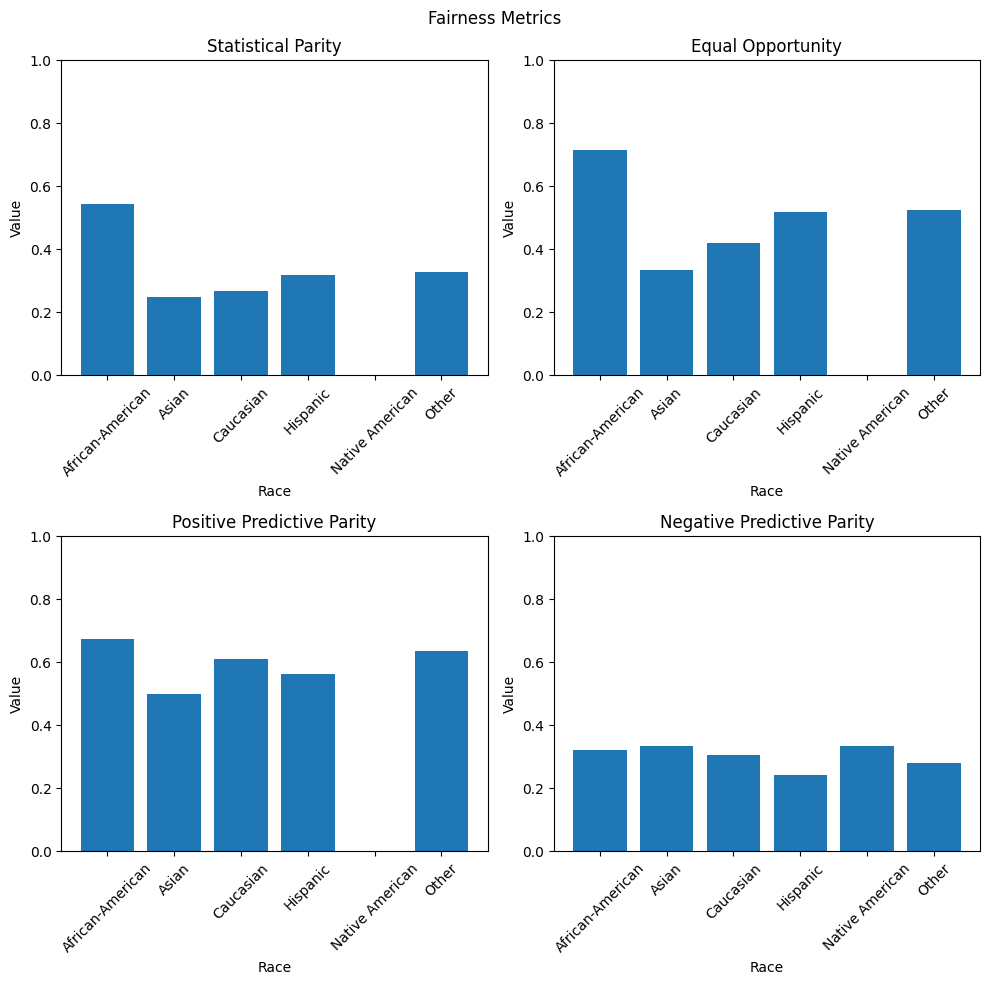

In [ ]:
def plot_metrics(fairness_coefficients):
    fig, axs = plt.subplots(2, 2, figsize=(10, 10))
    fig.suptitle('Fairness Metrics')


    axs[0, 0].bar(fairness_coefficients["statistical_parity"].keys(),
                  fairness_coefficients["statistical_parity"].values())
    axs[0, 0].set_title('Statistical Parity')
    axs[0, 0].set_ylim(0, 1)
    axs[0, 0].set_ylabel('Value')
    axs[0, 0].set_xlabel('Race')
    axs[0, 0].tick_params(axis='x', rotation=45)

    axs[0, 1].bar(fairness_coefficients["equal_opportunity"].keys(),
                  fairness_coefficients["equal_opportunity"].values())
    axs[0, 1].set_title('Equal Opportunity')
    axs[0, 1].set_ylim(0, 1)
    axs[0, 1].set_ylabel('Value')
    axs[0, 1].set_xlabel('Race')
    axs[0, 1].tick_params(axis='x', rotation=45)

    axs[1, 0].bar(fairness_coefficients["positive_predictive_parity"].keys(),
                  fairness_coefficients["positive_predictive_parity"].values())
    axs[1, 0].set_title('Positive Predictive Parity')
    axs[1, 0].set_ylim(0, 1)
    axs[1, 0].set_ylabel('Value')
    axs[1, 0].set_xlabel('Race')
    axs[1, 0].tick_params(axis='x', rotation=45)

    axs[1, 1].bar(fairness_coefficients["negative_predictive_parity"].keys(),
                  fairness_coefficients["negative_predictive_parity"].values())
    axs[1, 1].set_title('Negative Predictive Parity')
    axs[1, 1].set_ylim(0, 1)
    axs[1, 1].set_ylabel('Value')
    axs[1, 1].set_xlabel('Race')
    axs[1, 1].tick_params(axis='x', rotation=45)


    plt.tight_layout()
    plt.show()


plot_metrics(fairness_coefficients)



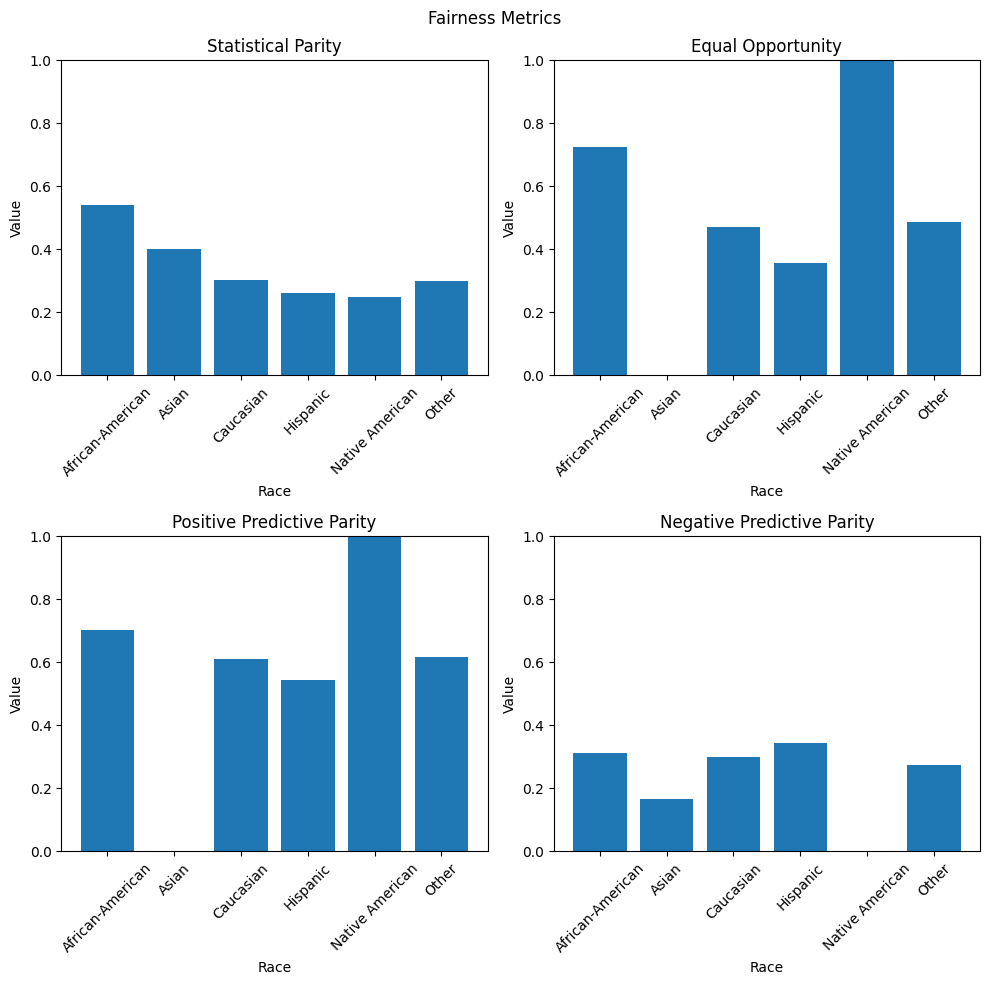

In [ ]:
plot_metrics(fairness_coefficients_weighted)


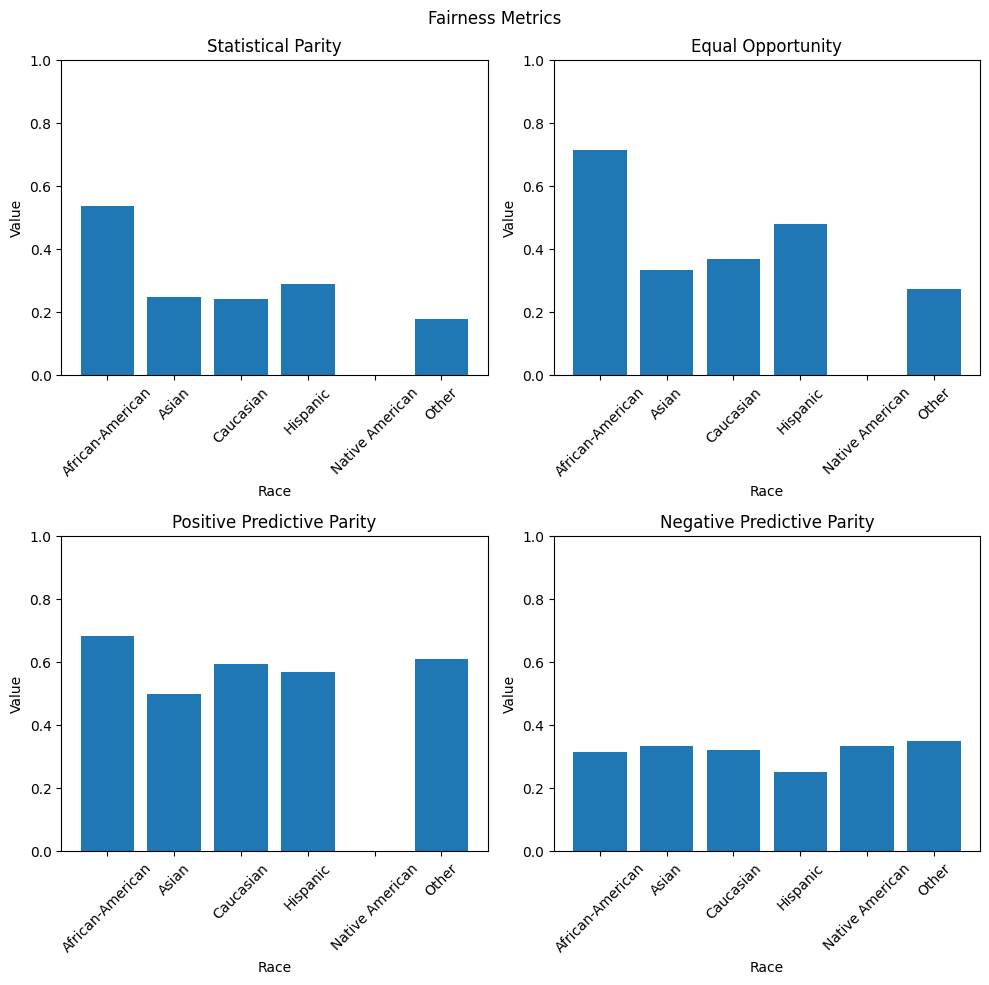

In [ ]:
plot_metrics(fairness_coefficients_logistic)

We can see that the